<a href="https://colab.research.google.com/github/mohammadRahimi1993/BigData/blob/main/LogisticRegression_BigData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.Connecting Drive to Colab**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2.Install package**

In [2]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install handyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **3.Setting up PySpark in Colab**

In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master('local[*]').getOrCreate()

In [5]:
import pyspark
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import *
from pyspark.sql import Row
from pyspark.sql.functions import *
from pyspark.sql.types import *

# **4.Load data**

In [6]:
data=spark.read.csv('/content/drive/MyDrive/DataSet/DataSartipi.csv',inferSchema=True, header=True)
data.show(10, truncate=False)

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+-------------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines   |InternetService|OnlineSecurity     |OnlineBackup       |DeviceProtection   |TechSupport        |StreamingTV        |StreamingMovies    |Contract      |PaperlessBilling|PaymentMethod            |MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+-------------------------+--------------+------------+-----+
|5331-RGMTT|Male  |1.0          |Yes    |No   

# **5.Preprocessing**

# **5.1 Delete of duplicate code**

In [7]:
print('Size of data is:', data.count())
data_Pro_1=data.dropDuplicates()
print('Size of unique data is:' , data_Pro_1.count())

Size of data is: 229990
Size of unique data is: 7838


# **5.2 Correlation between attribute**

In [8]:
data_Pro_11=data_Pro_1.dropDuplicates()
data_Pro_11=data_Pro_11.withColumn("Contract", when(col("Contract")== 'Two year', 2).when(col("Contract")== 'Two year', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("PaymentMethod", when(col("PaymentMethod")== 'Credit card (automatic)', 2).when(col("PaymentMethod")== 'Mailed check', 1)
                                   .when(col("PaymentMethod")== 'Bank transfer (automatic)', 3).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("StreamingMovies", when(col("StreamingMovies")== 'Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("InternetService", when(col("InternetService")== 'Fiber optic', 1).when(col("InternetService")== 'DSL', 2).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("OnlineBackup", when(col("OnlineBackup")== 'Yes', 1).when(col("OnlineBackup")== 'No', 2).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("PaperlessBilling", when(col("PaperlessBilling")== 'Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("Label", when(col("Label")== 'Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("gender", when(col("gender")== 'Male', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("Dependents", when(col("Dependents")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("PhoneService", when(col("PhoneService")== 'Male', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("MultipleLines", when(col("MultipleLines")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("OnlineSecurity", when(col("OnlineSecurity")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("DeviceProtection", when(col("DeviceProtection")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("TechSupport", when(col("TechSupport")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("StreamingTV", when(col("MultipleLines")=='Yes', 1).otherwise(0))
data_Pro_11=data_Pro_11.withColumn("Partner", when(col("Partner")=='Yes', 2).when(col("Partner")=='No', 1).otherwise(0))
#data_Pro_11.show()
print("Label and gender:",data_Pro_11.stat.corr('gender','Label'))
print("Contract and Label:",data_Pro_11.stat.corr('Contract','Label'))
print("PaymentMethod and Label:",data_Pro_11.stat.corr('PaymentMethod','Label'))
print("StreamingMovies and Label:",data_Pro_11.stat.corr('StreamingMovies','Label'))
print("InternetService and Label:",data_Pro_11.stat.corr('InternetService','Label'))
print("Label and PaperlessBilling:",data_Pro_11.stat.corr('PaperlessBilling','Label'))
print("Label and PhoneService:",data_Pro_11.stat.corr('PhoneService','Label'))
print("Label and Dependents:",data_Pro_11.stat.corr('Dependents','Label'))
print("Label and MultipleLines:",data_Pro_11.stat.corr('MultipleLines','Label'))
print("Label and OnlineSecurity:",data_Pro_11.stat.corr('OnlineSecurity','Label'))
print("Label and DeviceProtection:",data_Pro_11.stat.corr('DeviceProtection','Label'))
print("Label and TechSupport:",data_Pro_11.stat.corr('TechSupport','Label'))
print("Label and StreamingTV:",data_Pro_11.stat.corr('StreamingTV','Label'))
print("Label and MonthlyCharges:",data_Pro_11.stat.corr('MonthlyCharges','Label'))
print("Label and TotalCharges:",data_Pro_11.stat.corr('TotalCharges','Label'))
print("Label and tenure:",data_Pro_11.stat.corr('tenure','Label'))
print("Label and Partner:",data_Pro_11.stat.corr('Partner','Label'))
print("Label and SeniorCitizen:",data_Pro_11.stat.corr('SeniorCitizen','Label'))

Label and gender: 0.0009034104352871345
Contract and Label: -0.3031547304252856
PaymentMethod and Label: -0.23282410952807628
StreamingMovies and Label: 0.06775983818467908
InternetService and Label: 0.07083133356257558
Label and PaperlessBilling: 0.19017987006554868
Label and PhoneService: nan
Label and Dependents: -0.148964305888052
Label and MultipleLines: 0.06468899682802132
Label and OnlineSecurity: -0.14946060161973626
Label and DeviceProtection: -0.0340079867805602
Label and TechSupport: -0.15160056177015196
Label and StreamingTV: nan
Label and MonthlyCharges: 0.015147528817291386
Label and TotalCharges: -0.1811201876208274
Label and tenure: -0.22245865564659043
Label and Partner: -0.09638797477831562
Label and SeniorCitizen: 0.09764547724003525


# **5.3 Delete Columns of PhoneService and StreamingTV**

In [9]:
data_Pro_1=data_Pro_1.drop('PhoneService','StreamingTV')
# PaperlessBilling , Dependents 
print("Size of data is:" , data_Pro_1.count())
print("the data is:")
data_Pro_1.show(5)

Size of data is: 7838
the data is:
+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|3655-SNQYZ|Female|          0.0|    Yes|       Yes|  69.0|          Yes|    Fiber optic|                Yes|                Yes|     

# **5.4 Delete null fields of customerID and Lable**

In [10]:
#Delete null fields in customerID and Lable
data_Pro_2 = data_Pro_1.filter(data_Pro_1.customerID.isNotNull())
data_Pro_2 = data_Pro_2.filter(data_Pro_2.Label.isNotNull())
print("the data is delete with null customerID.")
print("Size of data is: ", data_Pro_2.count())
data_Pro_2.show(5)

the data is delete with null customerID.
Size of data is:  7437
+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|3655-SNQYZ|Female|          0.0|    Yes|       Yes|  69.0|          Yes|    Fiber optic|                

# Check null value

In [11]:
# Creating a dataframe to check null value counts
from pyspark.sql.functions import col,isnan, when, count
null_df = data_Pro_2.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '') | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in data_Pro_2.columns])

# Displaying the null value counts dataframe
null_df.show()

+----------+------+-------------+-------+----------+------+-------------+---------------+--------------+------------+----------------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+-------------+---------------+--------------+------------+----------------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|   123|          130|    106|       123|   109|          132|            119|           115|         128|             129|        138|            114|     110|             130|          133|           131|         122|    0|
+----------+------+-------------+-------+----------+

# **5.5 Replace missing values with means**

In [12]:
#Fill missing values of TotalCharges, MonthlyCharges and tenure to mean
print("*********************************************")
TotalCharges_mean = data_Pro_2.select(["TotalCharges"]).toPandas().mean()[0]
print("Avrage of TotalCharges columns is:",TotalCharges_mean)
data_Pro_2 = data_Pro_2.na.fill( TotalCharges_mean,subset='TotalCharges')
print("*********************************************")
MonthlyCharges_mean = data_Pro_2.select(["MonthlyCharges"]).toPandas().mean()[0]
print("Avrage of MonthlyCharges_mean columns is:",MonthlyCharges_mean)
data_Pro_2 = data_Pro_2.na.fill( MonthlyCharges_mean,subset='MonthlyCharges')
print("*********************************************")
tenure_mean = data_Pro_2.select(["tenure"]).toPandas().mean()[0]
print("Avrage of tenureCharges_mean columns is:",tenure_mean)
data_Pro_2 = data_Pro_2.na.fill(tenure_mean,subset='tenure')
print("the data next fill avg:\n")
data_Pro_2.show(5)

*********************************************
Avrage of TotalCharges columns is: 2286.55866028708
*********************************************
Avrage of MonthlyCharges_mean columns is: 90.42673145359987
*********************************************
Avrage of tenureCharges_mean columns is: 31.87295305676856
the data next fill avg:

+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+---

# **5.6 Replace missing values with means**

In [13]:
cnts = data_Pro_2.groupBy("SeniorCitizen").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("SeniorCitizen")
modeSeniorCitizen=mode.first()[0]
print("modeSeniorCitizen mode is:" , modeSeniorCitizen)
data_Pro_2=data_Pro_2.na.fill(value=modeSeniorCitizen,subset=["SeniorCitizen"])

modeSeniorCitizen mode is: 0.0


In [14]:
cnts = data_Pro_2.groupBy("gender").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("gender")
modegender=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modegender",["gender"])
#**************************************************
cnts = data_Pro_2.groupBy("Partner").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("Partner")
modePartner=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modePartner",["Partner"])
print(modePartner)
#**************************************************
cnts = data_Pro_2.groupBy("Dependents").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("Dependents")
modeDependents=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeDependents",["Dependents"])
#**************************************************
cnts = data_Pro_2.groupBy("MultipleLines").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("MultipleLines")
modeMultipleLines=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeMultipleLines",["MultipleLines"])
#**************************************************
cnts = data_Pro_2.groupBy("InternetService").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("InternetService")
modeInternetService=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeInternetService",["InternetService"])
#**************************************************
cnts = data_Pro_2.groupBy("OnlineSecurity").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("OnlineSecurity")
modeOnlineSecurity=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeOnlineSecurity",["OnlineSecurity"])
#**************************************************
cnts = data_Pro_2.groupBy("OnlineBackup").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("OnlineBackup")
modeOnlineBackup=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeOnlineBackup",["OnlineBackup"])
#**************************************************
cnts = data_Pro_2.groupBy("DeviceProtection").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("DeviceProtection")
modeDeviceProtection=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeDeviceProtection",["DeviceProtection"])
#**************************************************
cnts = data_Pro_2.groupBy("TechSupport").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("TechSupport")
modeTechSupport=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeTechSupport",["TechSupport"])
#**************************************************
cnts = data_Pro_2.groupBy("StreamingMovies").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("StreamingMovies")
modeStreamingMovies=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeStreamingMovies",["StreamingMovies"])
#**************************************************
cnts = data_Pro_2.groupBy("Contract").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("Contract")
modeContract=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modeContract",["Contract"])
#**************************************************
cnts = data_Pro_2.groupBy("PaperlessBilling").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("PaperlessBilling")
modePaperlessBilling=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modePaperlessBilling",["PaperlessBilling"])
#**************************************************
cnts = data_Pro_2.groupBy("PaymentMethod").count()
mode = cnts.join(cnts.agg(max("count").alias("max_")), col("count") == col("max_")).limit(1).select("PaymentMethod")
modePaymentMethod=mode.first()[0]
data_Pro_2=data_Pro_2.na.fill("modePaymentMethod",["PaymentMethod"])

No


# Check null value

In [15]:
# Creating a dataframe to check null value counts
from pyspark.sql.functions import col,isnan, when, count
null_df = data_Pro_2.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '') | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in data_Pro_2.columns])

# Displaying the null value counts dataframe
null_df.show()

+----------+------+-------------+-------+----------+------+-------------+---------------+--------------+------------+----------------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingMovies|Contract|PaperlessBilling|PaymentMethod|MonthlyCharges|TotalCharges|Label|
+----------+------+-------------+-------+----------+------+-------------+---------------+--------------+------------+----------------+-----------+---------------+--------+----------------+-------------+--------------+------------+-----+
|         0|     0|            0|      0|         0|     0|            0|              0|             0|           0|               0|          0|              0|       0|               0|            0|             0|           0|    0|
+----------+------+-------------+-------+----------+

# **6.Data Expolaration Analysis**

# **6.1 schema information**

In [16]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: double (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: double (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Label: string (nullable = true)



# **6.2 handyspark dataframe**

In [17]:
# PaperlessBilling and Dependents
from handyspark import *
data_Pro_22=data.dropDuplicates()
indexer= StringIndexer(inputCol="Label", outputCol="Label_index").fit(data_Pro_22)
data_Pro_22 = indexer.transform(data_Pro_22)
indexer= StringIndexer(inputCol="Contract", outputCol="Contract_index").fit(data_Pro_2)
data_Pro_22 = indexer.transform(data_Pro_22)
hdf = data_Pro_22.toHandy()
print('Size of data is: ',hdf.count())
hdf.show(3)

Size of data is:  7838
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+-----------+--------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Label|Label_index|Contract_index|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+

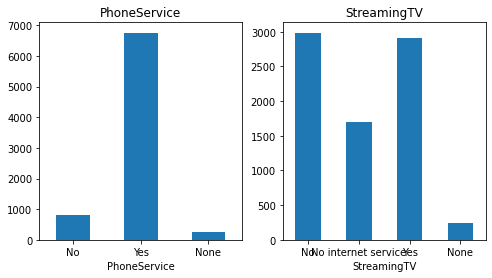

In [18]:
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
#hdf.cols[['TotalCharges', 'Label_index']].scatterplot(ax=axs[2])
hdf.cols['PhoneService'].hist(ax=axs[0])
hdf.cols['StreamingTV'].hist(ax=axs[1])

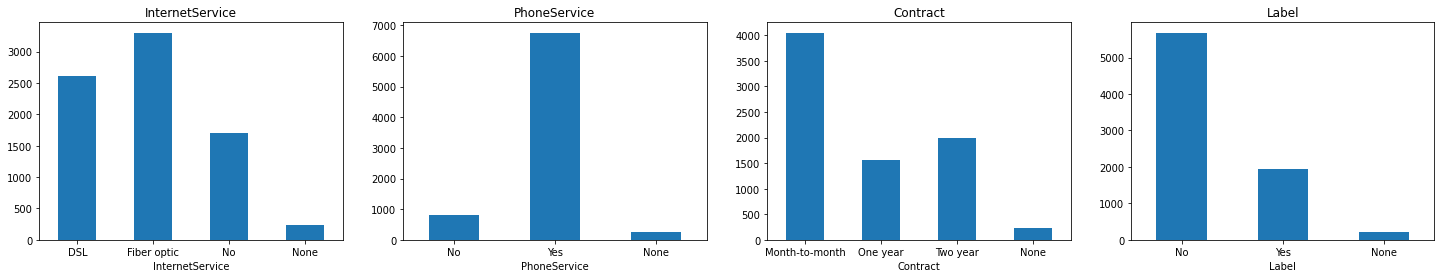

In [19]:
#hdf.cols['PhoneService'].value_counts(dropna=False)
#hdf.cols['Contract'].boxplot(ax=axs[2])
from matplotlib import pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(25, 4))
#hdf.cols[['TotalCharges', 'Label_index']].scatterplot(ax=axs[2])
hdf.cols['InternetService'].hist(ax=axs[0])
hdf.cols['PhoneService'].hist(ax=axs[1])
hdf.cols['Contract'].hist(ax=axs[2])
hdf.cols['Label'].hist(ax=axs[3])

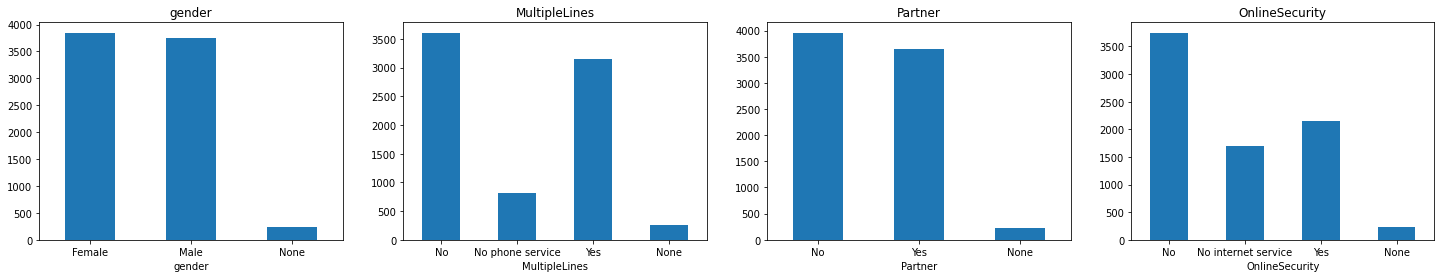

In [20]:
fig, axs = plt.subplots(1, 4, figsize=(25, 4))
#hdf.cols[['TotalCharges', 'Label_index']].scatterplot(ax=axs[2])
hdf.cols['gender'].hist(ax=axs[0])
hdf.cols['MultipleLines'].hist(ax=axs[1])
hdf.cols['Partner'].hist(ax=axs[2])
hdf.cols['OnlineSecurity'].hist(ax=axs[3])

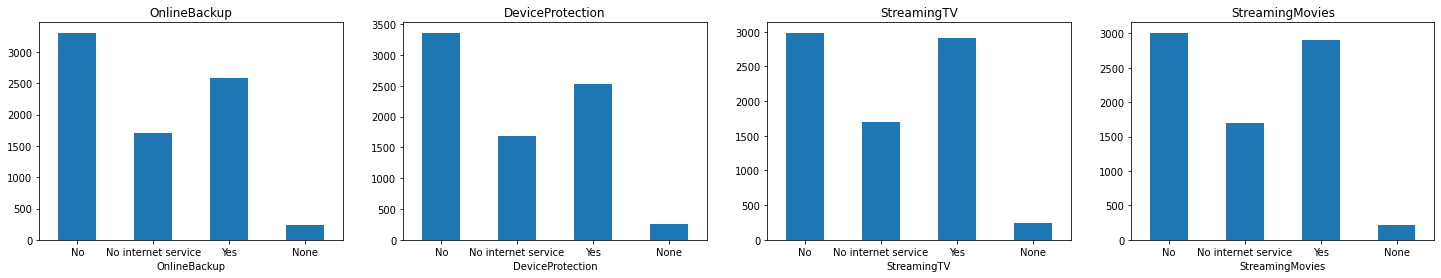

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(25, 4))
#hdf.cols[['TotalCharges', 'Label_index']].scatterplot(ax=axs[2])
hdf.cols['OnlineBackup'].hist(ax=axs[0])
hdf.cols['DeviceProtection'].hist(ax=axs[1])
hdf.cols['StreamingTV'].hist(ax=axs[2])
hdf.cols['StreamingMovies'].hist(ax=axs[3])

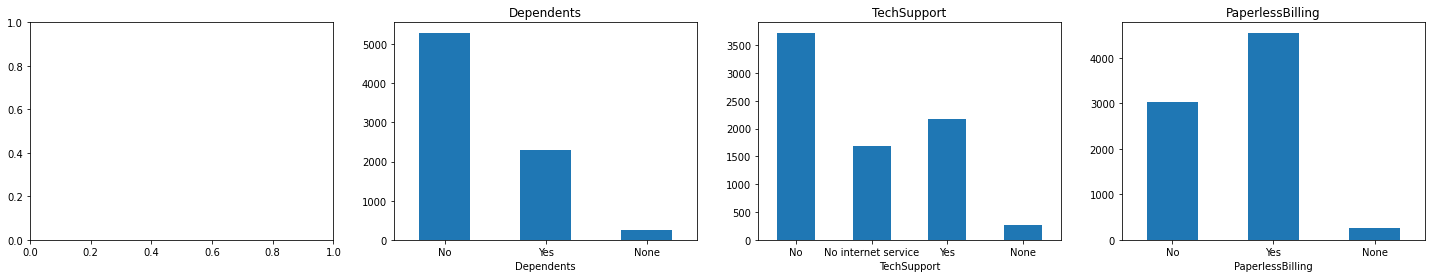

In [22]:
fig, axs = plt.subplots(1, 4, figsize=(25, 4))
#hdf.cols[['TotalCharges', 'Label_index']].scatterplot(ax=axs[2])
#hdf.cols['SeniorCitizen'].hist(ax=axs[0])
hdf.cols['Dependents'].hist(ax=axs[1])
hdf.cols['TechSupport'].hist(ax=axs[2])
hdf.cols['PaperlessBilling'].hist(ax=axs[3])

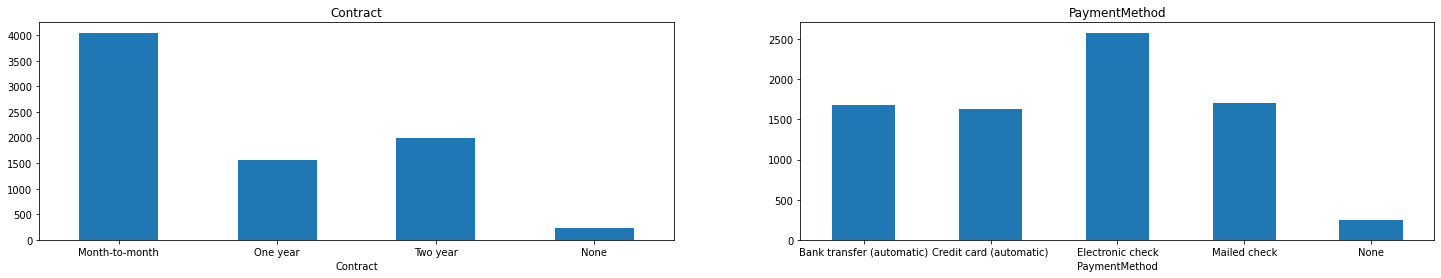

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(25, 4))
hdf.cols['Contract'].hist(ax=axs[0])
hdf.cols['PaymentMethod'].hist(ax=axs[1])

(<Figure size 432x288 with 2 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f3491ccd250>])

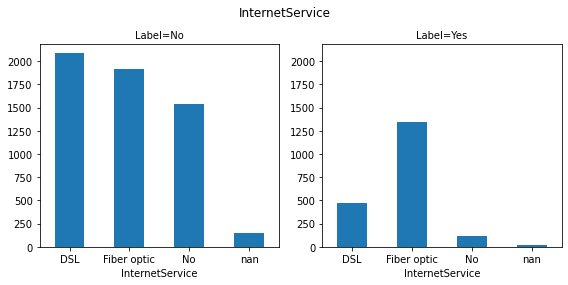

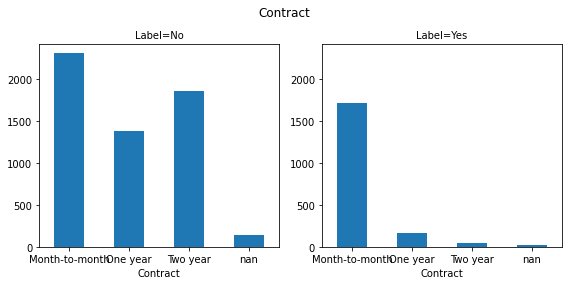

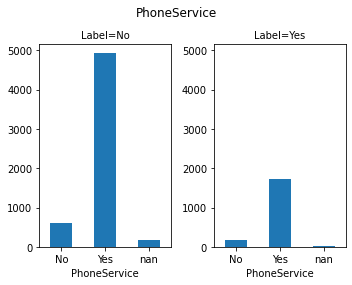

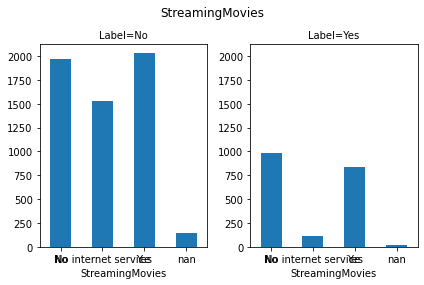

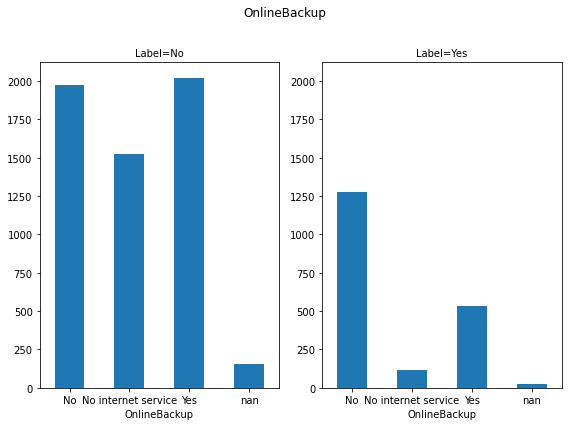

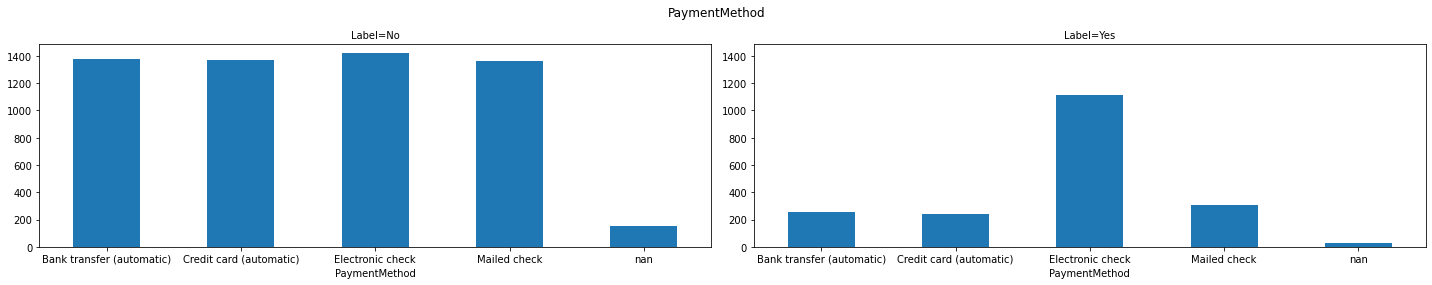

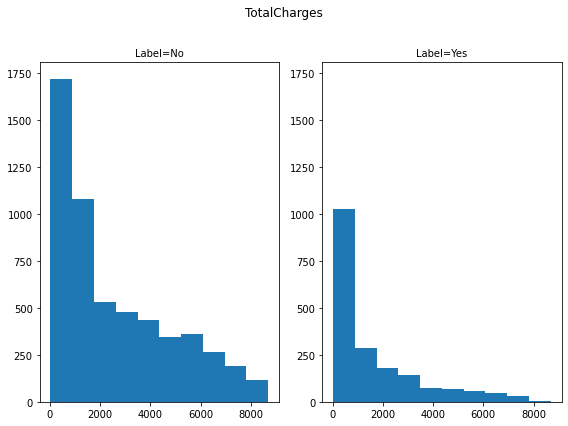

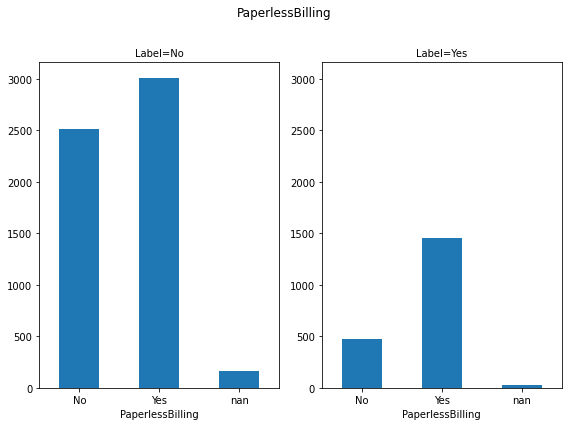

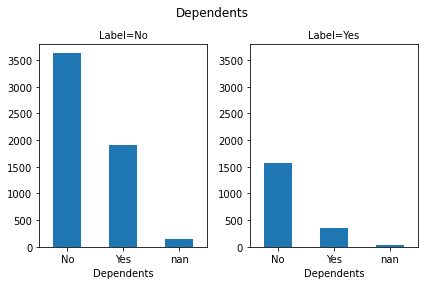

In [24]:
# hdf.stratify(['Label', Bucket('TotalCharges', 2)]).cols['PhoneService'].hist(figsize=(8, 6))
hdf.stratify(['Label']).cols['InternetService'].hist(figsize=(8, 4))
hdf.stratify(['Label']).cols['Contract'].hist(figsize=(8, 4))
hdf.stratify(['Label']).cols['PhoneService'].hist(figsize=(5, 4))
hdf.stratify(['Label']).cols['StreamingMovies'].hist(figsize=(6, 4))
hdf.stratify(['Label']).cols['OnlineBackup'].hist(figsize=(8, 6))
hdf.stratify(['Label']).cols['PaymentMethod'].hist(figsize=(20, 4))
hdf.stratify(['Label']).cols['TotalCharges'].hist(figsize=(8, 6))
hdf.stratify(['Label']).cols['PaperlessBilling'].hist(figsize=(8, 6))
hdf.stratify(['Label']).cols['Dependents'].hist(figsize=(6, 4))
#hdf.stratify(['Label']).cols['gender'].hist(figsize=(8, 6))

# **7.Implementing logistic regression**

In [25]:
hasher = FeatureHasher(inputCols=["gender","SeniorCitizen", "Partner", "Dependents" ,"tenure", "MultipleLines", "InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingMovies", "Contract","PaperlessBilling","PaymentMethod", "MonthlyCharges", "TotalCharges"],
                       outputCol="features")
hasher_org = FeatureHasher(inputCols=["gender", "SeniorCitizen", "Partner", "Dependents","tenure", "PhoneService", "MultipleLines", "InternetService","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract","PaperlessBilling","PaymentMethod", "MonthlyCharges", "TotalCharges"],
                       outputCol="features")
featurized = hasher.transform(data_Pro_2)
data_DelDup=data.dropDuplicates()
featurized_org = hasher_org.transform(data_DelDup)
featurized.show(5, truncate=False)
featurized_org.show(5, truncate=False)

+----------+------+-------------+-------+----------+------+-------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+-------------------------+--------------+------------+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|MultipleLines|InternetService|OnlineSecurity     |OnlineBackup       |DeviceProtection   |TechSupport        |StreamingMovies    |Contract      |PaperlessBilling|PaymentMethod            |MonthlyCharges|TotalCharges|Label|features                                                                                                                                                                                                  |
+----------+------+-----------

# **7.1.Featurizing**

In [26]:
featurized=featurized["Label","features","customerID"]
featurized_org=featurized_org["Label","features","customerID"]
featurized.show(5, truncate=False)
featurized_org.show(5, truncate=False)

+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|Label|features                                                                                                                                                                                                  |customerID|
+-----+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------+
|No   |(262144,[20762,40671,62450,72938,74746,109041,112867,143274,152436,180881,196278,203276,222701,241506,246667,253914,256762],[113.25,1.0,1.0,1.0,1.0,1.0,1.0,69.0,1.0,1.0,1.0,1.0,0.0,1.0,7895.15,1.0,1.0])|3655-SNQYZ|
|No   |(262144,[20545,20762,53807,57644,72938,97174,97284,100321,139721,143274,148734,152436,153197,213513,22270

In [27]:
def f(x): 
    if(x == 'Yes'):
       return 1

    else:
       return 0

featurized=featurized.withColumn("label", when(col("Label")=='Yes', 1).otherwise(0))
featurized=featurized.withColumnRenamed("Label","label")
featurized_org=featurized_org.withColumn("label", when(col("Label")=='Yes', 1).otherwise(0))
featurized_org=featurized_org.withColumnRenamed("Label","label")
featurized.show(5)
featurized_org.show(5)

+-----+--------------------+----------+
|label|            features|customerID|
+-----+--------------------+----------+
|    0|(262144,[20762,40...|3655-SNQYZ|
|    0|(262144,[20545,20...|7114-AEOZE|
|    1|(262144,[20762,34...|8621-MNIHH|
|    1|(262144,[7831,205...|4580-TMHJU|
|    0|(262144,[20762,34...|5553-AOINX|
+-----+--------------------+----------+
only showing top 5 rows

+-----+--------------------+----------+
|label|            features|customerID|
+-----+--------------------+----------+
|    0|(262144,[20762,40...|3655-SNQYZ|
|    0|(262144,[20545,20...|7114-AEOZE|
|    1|(262144,[20762,34...|8621-MNIHH|
|    1|(262144,[7831,205...|4580-TMHJU|
|    0|(262144,[20762,34...|5553-AOINX|
+-----+--------------------+----------+
only showing top 5 rows



# **7.2.Spliting data into training and test sets**

In [28]:
train, test = featurized.randomSplit(weights=[0.8,0.2], seed=200)
train_org, test_org = featurized_org.randomSplit(weights=[0.8,0.2], seed=200)

# **7.3. Creating an instance of logistic regression**

In [29]:
lr=LogisticRegression(maxIter=1000,regParam=0.0000001) # as an estimator
lr.explainParams()

"aggregationDepth: suggested depth for treeAggregate (>= 2). (default: 2)\nelasticNetParam: the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty. (default: 0.0)\nfamily: The name of family which is a description of the label distribution to be used in the model. Supported options: auto, binomial, multinomial (default: auto)\nfeaturesCol: features column name. (default: features)\nfitIntercept: whether to fit an intercept term. (default: True)\nlabelCol: label column name. (default: label)\nlowerBoundsOnCoefficients: The lower bounds on coefficients if fitting under bound constrained optimization. The bound matrix must be compatible with the shape (1, number of features) for binomial regression, or (number of classes, number of features) for multinomial regression. (undefined)\nlowerBoundsOnIntercepts: The lower bounds on intercepts if fitting under bound constrained optimization. The bounds vector size must be

# **7.4. Learning the model**

In [30]:
model1=lr.fit(train)
model_org=lr.fit(train_org)

In [31]:
model1.coefficients
model_org.coefficients

SparseVector(262144, {4236: 0.0278, 7831: 0.6325, 20545: 0.7789, 20762: 0.0001, 34708: 0.4062, 35396: 0.2204, 40671: 0.9599, 53807: -0.2757, 57644: 0.2607, 59103: -0.1155, 62450: 0.2917, 72938: -0.8713, 74746: 0.0223, 77335: -0.3842, 97174: -0.3588, 97284: -0.0837, 100321: -0.0757, 109041: -0.545, 112867: -0.2779, 119757: 0.6537, 124394: 1.3732, 139220: -0.1445, 139721: 0.4224, 143274: -0.0018, 144208: -0.0741, 144894: 0.2901, 148734: 0.0747, 152436: 0.0674, 153197: 0.281, 163470: -0.0357, 180881: -0.533, 190858: -0.3283, 190991: 0.9391, 196278: 0.2492, 203276: 1.0361, 205898: -0.2285, 213513: 0.115, 218283: 0.971, 222701: 0.1222, 240448: 0.0933, 241506: 0.9152, 246667: -0.0003, 253914: 0.2782, 256762: 0.5875, 257928: 0.1671})

# **7.4 Test**

In [32]:
predictions=model1.transform(test)
predictions_org=model_org.transform(test)
predictions.show(5)
predictions_org.show(5)

+-----+--------------------+--------------+--------------------+--------------------+----------+
|label|            features|    customerID|       rawPrediction|         probability|prediction|
+-----+--------------------+--------------+--------------------+--------------------+----------+
|    0|(262144,[2765,423...|2639-UGMAZcsas|[2.56335668243997...|[0.92846571983105...|       0.0|
|    0|(262144,[2765,559...|6734-PSBAWcsas|[3.25399361768749...|[0.96281635281887...|       0.0|
|    0|(262144,[2765,559...|4622-YNKIJcsas|[3.83013644480368...|[0.97875451472322...|       0.0|
|    0|(262144,[2765,559...|7219-TLZHOcsas|[0.67962276948989...|[0.66365449826324...|       0.0|
|    0|(262144,[2765,559...|6734-PSBAWcsas|[3.49159163428566...|[0.97044757661938...|       0.0|
+-----+--------------------+--------------+--------------------+--------------------+----------+
only showing top 5 rows

+-----+--------------------+--------------+--------------------+--------------------+----------+
|labe

# **7.5 Comparing labels with predictions**

In [33]:
predictions.groupBy('label', 'prediction').count().show()
predictions_org.groupBy('label', 'prediction').count().show()


# Calculate the elements of the confusion matrix
TN = predictions.filter('prediction = 0 AND label = prediction').count()
TP = predictions.filter('prediction = 1 AND label = prediction').count()
FN = predictions.filter('prediction = 0 AND label = 1').count()
FP = predictions.filter('prediction = 1 AND label = 0').count()
# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("Accuracy of preprocess data is:",accuracy)

# Calculate the elements of the confusion matrix
TN_org = predictions_org.filter('prediction = 0 AND label = prediction').count()
TP_org = predictions_org.filter('prediction = 1 AND label = prediction').count()
FN_org = predictions_org.filter('prediction = 0 AND label = 1').count()
FP_org = predictions_org.filter('prediction = 1 AND label = 0').count()

# Accuracy measures the proportion of correct predictions
accuracy_org = (TN_org + TP_org) / (TN_org + TP_org + FN_org + FP_org)
print("Accuracy of orginal  data is:",accuracy_org)

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|  194|
|    0|       0.0|  999|
|    1|       1.0|  222|
|    0|       1.0|   95|
+-----+----------+-----+

+-----+----------+-----+
|label|prediction|count|
+-----+----------+-----+
|    1|       0.0|  206|
|    0|       0.0| 1003|
|    1|       1.0|  210|
|    0|       1.0|   91|
+-----+----------+-----+

Accuracy of preprocess data is: 0.8086092715231789
Accuracy of orginal  data is: 0.8033112582781456
